In [1]:
import numpy as np
import pandas as pd

from tqdm.notebook import tqdm

from file_manager import FileManager
fm = FileManager()

In [2]:
# Pass in player dataframe
def overview(df: pd.DataFrame):
    infocols: list[str,...] = ['date', 'name', 'team', 'opp', 'starter']
    statcols: list[str,...] = [col for col in df.columns if col not in infocols]

    last10: list[str,...] = list((df
                                  .sort_values('date', ascending=False)
                                  ['date']
                                 ))[:10]
    
    last5: list[str,...] = last10[:5]
    
    # overview
    ov: dict[str,str|int|float] = {
        'name': df['name'].drop_duplicates().item(),
        'team(s)': ','.join(df['team'].drop_duplicates()),
        'played': len(df),
        'started': len(df.loc[df['starter']==1])
    }
    
    distro: pd.Series = df['fpts'].describe().round(1)
    
    ov: dict[str, str|int|float] = {
        **ov,
        **{'ceiling': distro['75%'],'floor': distro['25%']},
        **{f'med-{stat}': np.median(df[stat]).round(2) for stat in statcols},
        **{
            f'l10-median-{stat}': np.median(df.loc[df['date'].isin(last10),stat]) 
            for stat in ('fpts', 'fppm', 'mp')
        },
        **{
            f'l5-median-{stat}': np.median(df.loc[df['date'].isin(last5),stat]) 
            for stat in ('fpts', 'fppm', 'mp')
        }
    }
    
    return pd.Series(ov)

In [30]:
# Return graph of player outcomes
def view_player(name: str, **kwargs):
    
    columns: list[str,...] = [
        'date',
        'name',
        'team',
        'opp',
        'fpts',
        'mp',
        'fppm',
        'usg',
        'pts',
        'ast',
        'trb',
        'starter'
    ]
    
    stats: list[str,...] = sum([
        columns,
        kwargs.get('stats', [])
    ], [])
    
    starter_: tuple[int,...] = (0,1) if kwargs.get('starter') is None else (int(kwargs['starter']),)
    
    df: pd.DataFrame = (fm
                        .load_clean_data()
                        .pipe(lambda df_: df_.loc[(df_['name'] == name)
                                                  & df_['starter'].isin(starter_)
                                                 ])
                        [stats]
                       )
    
    
    ov: pd.Series = overview(df)
    bins_: int = int(ov['played']) // 2
    print(ov)
    
    plot: str = kwargs.get('plot', 'histogram')
    plotkwargs = {kw:arg for kw,arg in kwargs.items() if kw not in ('stats','target', 'starter')}
    
    plotkwargs = {
        **plotkwargs,
        **{'figsize': plotkwargs.get('figsize',(15,10)), 'bins': plotkwargs.get('bins', bins_)}
    }
    
    target: str = kwargs.get('target', 'fpts')
    
    
    if plot in ('hist', 'histogram'):
        return (df
                .plot
                .hist(
                    column=[target],
                    # Nondefault args for hist
                    # bins=plotkwargs.get('bins', 7),
                    # figsize=figsize,
                    **plotkwargs
                )
               )
    
    if plot in ('box', 'boxplot'):
        return (df
                .plot
                .box(column=[target],figsize=plotkwargs['figsize'])
               )
    
    return None

name               Damian Lillard
team(s)                       POR
played                         46
started                        46
ceiling                      54.7
floor                        39.0
med-fpts                     51.0
med-mp                      37.25
med-fppm                     1.32
med-usg                      0.33
med-pts                      30.5
med-ast                       8.0
med-trb                       4.0
l10-median-fpts             53.45
l10-median-fppm          1.409066
l10-median-mp              38.375
l5-median-fpts               54.7
l5-median-fppm            1.47541
l5-median-mp            35.916667
dtype: object


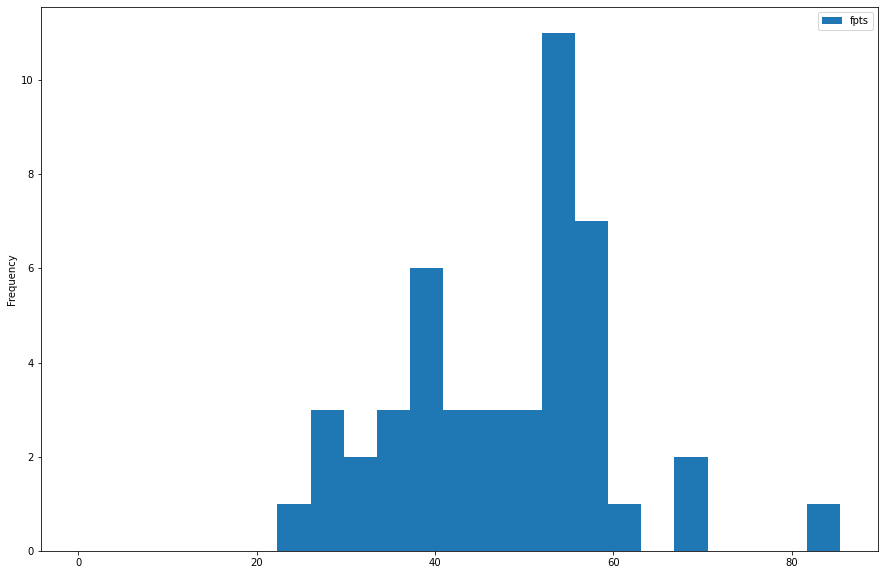

In [31]:
view_player(
    'Damian Lillard',
    # starter=True,
    # plot='box',
    # bins=46,
);

name               Jordan Poole
team(s)                      GS
played                       37
started                      37
ceiling                    42.6
floor                      28.9
med-fpts                   34.5
med-mp                    32.58
med-fppm                   1.02
med-usg                     0.3
med-pts                    24.0
med-ast                     4.0
med-trb                     3.0
l10-median-fpts            33.0
l10-median-fppm        1.105476
l10-median-mp         30.933333
l5-median-fpts             28.4
l5-median-fppm         0.937931
l5-median-mp          30.966667
dtype: object


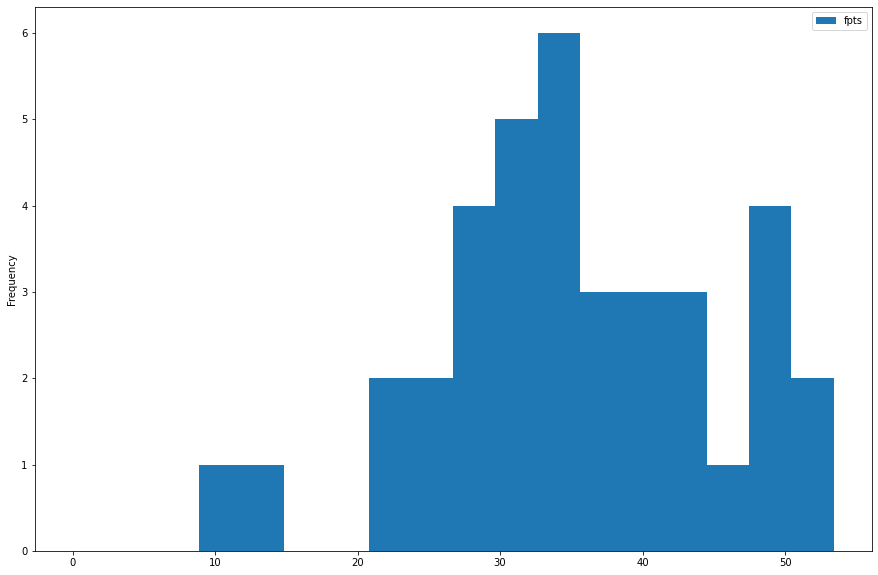

In [32]:
view_player(
    'Jordan Poole',
    starter=True,
    # plot='box',
    # bins=5,
    # width=10
);

name               Rudy Gobert
team(s)                    MIN
played                      51
started                     51
ceiling                   41.8
floor                     25.3
med-fpts                  32.6
med-mp                    31.5
med-fppm                   1.1
med-usg                   0.16
med-pts                   15.0
med-ast                    1.0
med-trb                   12.0
l10-median-fpts           34.2
l10-median-fppm       1.095756
l10-median-mp           29.875
l5-median-fpts            36.3
l5-median-fppm        1.221537
l5-median-mp         29.716667
dtype: object


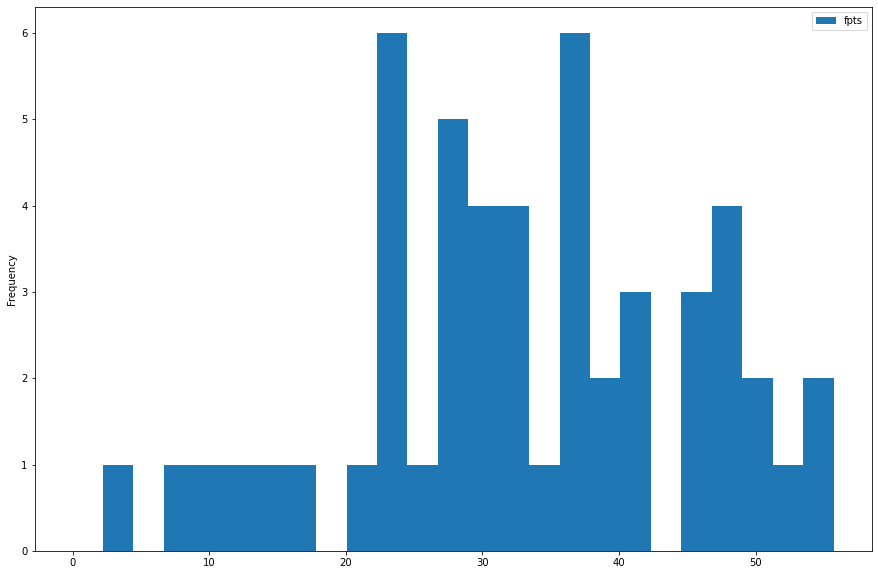

In [33]:
view_player(
    'Rudy Gobert',
    # starter=False,
    # plot='box',
    # bins=5,
    # width=10
);

name               Nicolas Batum
team(s)                      LAC
played                        47
started                        0
ceiling                     22.0
floor                        8.4
med-fpts                    14.9
med-mp                      21.1
med-fppm                    0.72
med-usg                     0.12
med-pts                      4.0
med-ast                      1.0
med-trb                      4.0
l10-median-fpts            13.35
l10-median-fppm         0.685704
l10-median-mp          24.983333
l5-median-fpts               8.4
l5-median-fppm          0.881119
l5-median-mp           24.016667
dtype: object


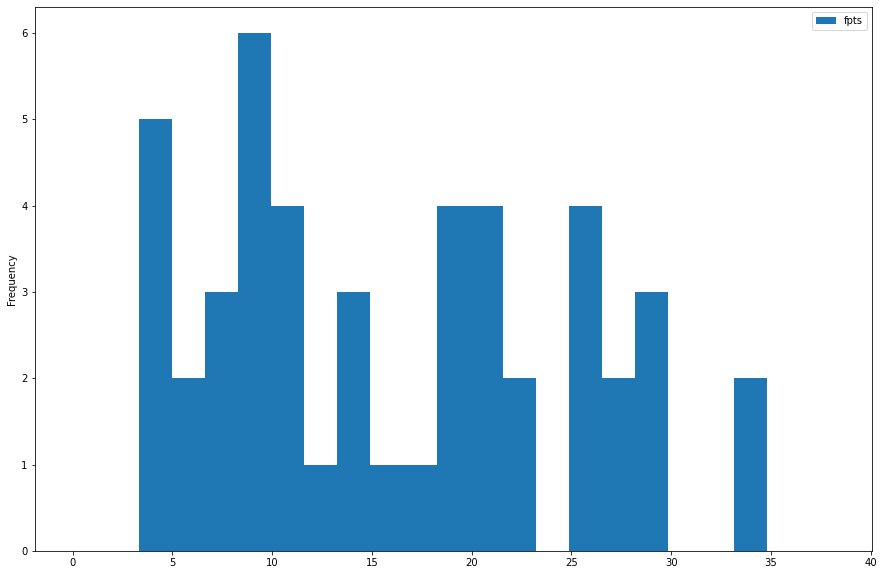

In [46]:
view_player(
    'Nicolas Batum',
    starter=False,
    # plot='box',
    # bins=5,
    # width=10
);

name               Shaedon Sharpe
team(s)                       POR
played                         53
started                         0
ceiling                      16.7
floor                         9.1
med-fpts                     12.7
med-mp                       19.4
med-fppm                     0.65
med-usg                      0.16
med-pts                       7.0
med-ast                       0.0
med-trb                       2.0
l10-median-fpts              15.9
l10-median-fppm          0.663769
l10-median-mp           23.216667
l5-median-fpts               23.4
l5-median-fppm           1.053061
l5-median-mp            25.566667
dtype: object


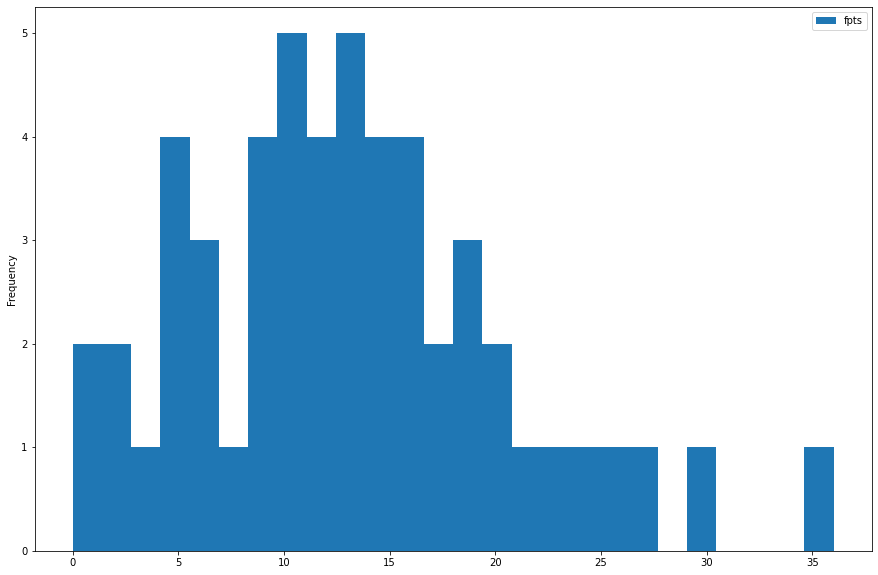

In [48]:
view_player(
    'Shaedon Sharpe',
    starter=False,
    # plot='box',
    # bins=5,
    # width=10
);

name               Nassir Little
team(s)                      POR
played                        36
started                        0
ceiling                     15.9
floor                        6.7
med-fpts                   12.15
med-mp                     15.06
med-fppm                    0.73
med-usg                     0.15
med-pts                      6.0
med-ast                      1.0
med-trb                      2.0
l10-median-fpts            12.85
l10-median-fppm         0.634795
l10-median-mp             16.525
l5-median-fpts              15.5
l5-median-fppm          0.708633
l5-median-mp           24.633333
dtype: object


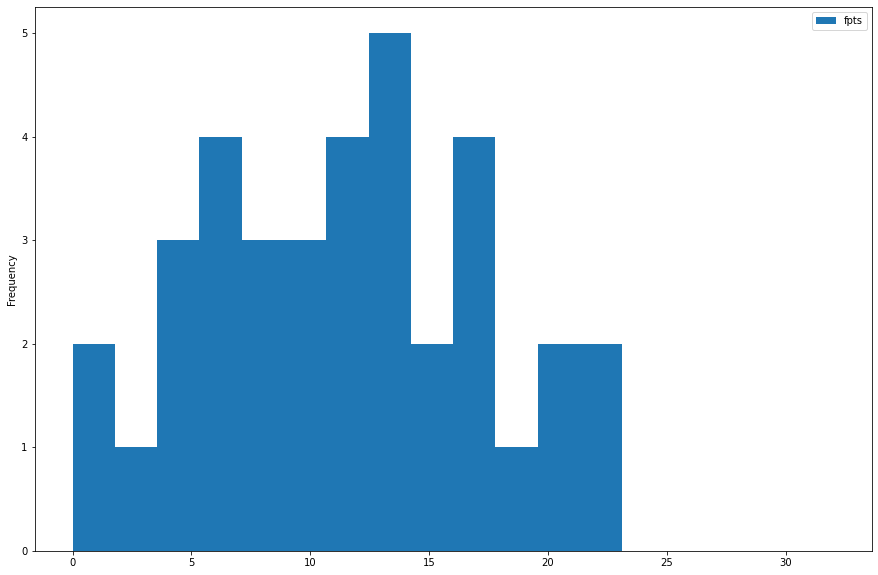

In [49]:
view_player(
    'Nassir Little',
    starter=False,
    # plot='box',
    # bins=5,
    # width=10
);